In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [48]:
# Cria as variáveis do problema

comida = ctrl.Antecedent(np.arange(0,11,1),'comida')
servico = ctrl.Antecedent(np.arange(0,11,1),'servico')
gorjeta = ctrl.Consequent(np.arange(0,26,1),'gorjeta')

In [49]:
# definindo o conjunto nebuloso
# Cria automaticamente o mapeamento entre (conceitos (valores nebulosos) e o espaço real - valores nítidos e difusos
# usando uma função de pertinência padrão (triângulo)

comida.automf(names=['péssima','comivel','deliciosa'])

In [50]:
# Cria as funções de pertinência usando tipos variados

servico['ruim'] = fuzz.trimf(servico.universe,[0,0,5])
servico['aceitavel'] = fuzz.gaussmf(servico.universe,5,2)
servico['excelente'] = fuzz.gaussmf(servico.universe,10,3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0,0,13])
gorjeta['media'] = fuzz.trapmf(gorjeta.universe, [0,13,15,25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15,25,25])

# mostrando graficamente as funções de pertinência criadas

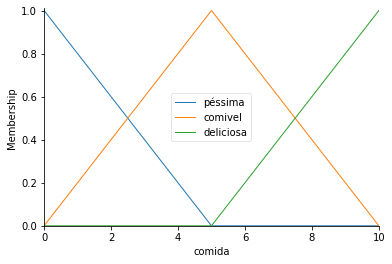

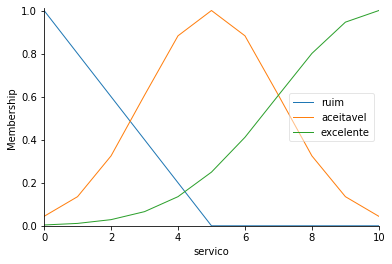

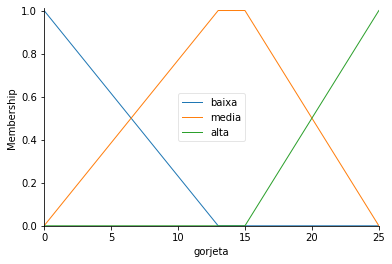

In [51]:

comida.view()
servico.view()
gorjeta.view()

# Criando as regras de decisão difusas

In [36]:
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
rule3 = ctrl.Rule(servico['ruim'] & comida['péssima'], gorjeta['baixa'])

# Criando e simulando um controlador nebuloso

In [38]:


gorjeta_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

In [39]:
# Entrando com alguns valores para qualidade da comida e do serviço

gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

In [41]:
# Computadon o resultado

gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])

18.57604101547121


# Mostrando graficamente o resultado

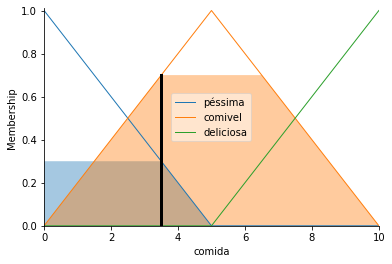

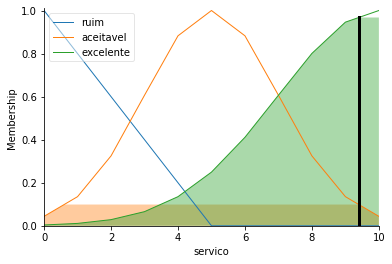

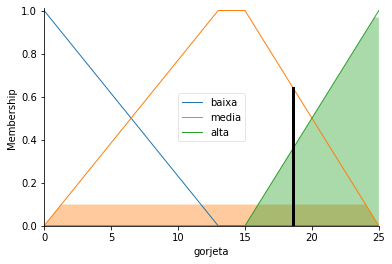

In [42]:
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)